In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

In [5]:
train_dataset=pd.read_csv('development_dataset.csv')
test_dataset=pd.read_csv('leaderboard_dataset.csv')

In [6]:
print(train_dataset.shape)
print(test_dataset.shape)

(34000, 21)
(10000, 20)


In [7]:
train_dataset.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,...,100.083403,1.0,1,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,...,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,...,210.175146,10.0,1,10.0,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,NaN,.,NaN,1.558341,NaN,1,0,101.268503,High


In [8]:
data=pd.concat([train_dataset,test_dataset])

/home/kaaira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
print(data.shape)


(44000, 21)


In [10]:
print(data['VAR21'])

0          Low
1         High
2       Medium
3          Low
4         High
5          Low
6          Low
7       Medium
8          Low
9       Medium
10         Low
11         Low
12         Low
13        High
14      Medium
15        High
16         Low
17         Low
18         Low
19         Low
20      Medium
21         Low
22      Medium
23      Medium
24      Medium
25      Medium
26         Low
27         Low
28         Low
29         Low
         ...  
9970       NaN
9971       NaN
9972       NaN
9973       NaN
9974       NaN
9975       NaN
9976       NaN
9977       NaN
9978       NaN
9979       NaN
9980       NaN
9981       NaN
9982       NaN
9983       NaN
9984       NaN
9985       NaN
9986       NaN
9987       NaN
9988       NaN
9989       NaN
9990       NaN
9991       NaN
9992       NaN
9993       NaN
9994       NaN
9995       NaN
9996       NaN
9997       NaN
9998       NaN
9999       NaN
Name: VAR21, Length: 44000, dtype: object


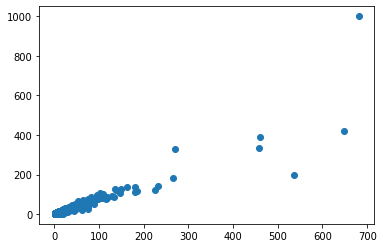

In [11]:
plt.scatter(train_dataset['VAR7'],train_dataset['VAR16'])
plt.show()

In [12]:
train_dataset.loc[:,'VAR14'][train_dataset.loc[:,'VAR14'].isin(['.'])]=0
train_dataset['VAR14']=train_dataset['VAR14'].apply(pd.to_numeric)

/home/kaaira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
test_dataset.loc[:,'VAR14'][test_dataset.loc[:,'VAR14'].isin(['.'])]=0
test_dataset['VAR14']=test_dataset['VAR14'].apply(pd.to_numeric)

/home/kaaira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
mean_data = {
    'VAR10': 56.497319916561565,
    'VAR11': 5.4290617632523634,
    'VAR12': 117.28366711019322,
    'VAR13': 11.67958939730443,
    'VAR15': 12.453257109061381,
    'VAR16': 2.092006359280712,
    'VAR17': 821.281091817721,
    'VAR18': 0.40002941176470586,
    'VAR19': 0.29805882352941176,
    'VAR2': 917.3916031483315,
    'VAR20': 161.35594998478794,
    'VAR3': 1.1195956999950352,
    'VAR4': 248.07620132529897,
    'VAR5': 631.5713914682914,
    'VAR6': 15.290028445341045,
    'VAR7': 2.0552948772701423,
    'VAR8': 200.00716889702667,
    'VAR9': 53.988554410139486,
}

In [15]:
train_dataset.info()
test_dataset.info()
train_dataset.isnull().count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 21 columns):
VAR1     34000 non-null int64
VAR2     33039 non-null float64
VAR3     30615 non-null float64
VAR4     21506 non-null float64
VAR5     33999 non-null float64
VAR6     30505 non-null float64
VAR7     33165 non-null float64
VAR8     33165 non-null float64
VAR9     18183 non-null float64
VAR10    29450 non-null float64
VAR11    26435 non-null float64
VAR12    23498 non-null float64
VAR13    25478 non-null float64
VAR14    34000 non-null int64
VAR15    25976 non-null float64
VAR16    33134 non-null float64
VAR17    11806 non-null float64
VAR18    34000 non-null int64
VAR19    34000 non-null int64
VAR20    34000 non-null float64
VAR21    34000 non-null object
dtypes: float64(16), int64(4), object(1)
memory usage: 5.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
VAR1     10000 non-null int64
VAR2     9733 non-null floa

VAR1     34000
VAR2     34000
VAR3     34000
VAR4     34000
VAR5     34000
VAR6     34000
VAR7     34000
VAR8     34000
VAR9     34000
VAR10    34000
VAR11    34000
VAR12    34000
VAR13    34000
VAR14    34000
VAR15    34000
VAR16    34000
VAR17    34000
VAR18    34000
VAR19    34000
VAR20    34000
VAR21    34000
dtype: int64

In [16]:
y=train_dataset.iloc[:,20]
print(y)

0           Low
1          High
2        Medium
3           Low
4          High
5           Low
6           Low
7        Medium
8           Low
9        Medium
10          Low
11          Low
12          Low
13         High
14       Medium
15         High
16          Low
17          Low
18          Low
19          Low
20       Medium
21          Low
22       Medium
23       Medium
24       Medium
25       Medium
26          Low
27          Low
28          Low
29          Low
          ...  
33970       Low
33971    Medium
33972    Medium
33973    Medium
33974       Low
33975    Medium
33976       Low
33977       Low
33978    Medium
33979    Medium
33980    Medium
33981       Low
33982    Medium
33983       Low
33984      High
33985    Medium
33986      High
33987    Medium
33988    Medium
33989       Low
33990    Medium
33991    Medium
33992    Medium
33993       Low
33994    Medium
33995       Low
33996    Medium
33997       Low
33998       Low
33999      High
Name: VAR21, Length: 340

In [17]:
X=train_dataset.drop(data.columns[0],axis=1)
X=train_dataset.drop(['VAR21'],axis=1)
y=train_dataset['VAR21']

X_leaderboard=test_dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(X_leaderboard.isnull())

(23800, 20)
(10200, 20)
       VAR1   VAR2   VAR3   VAR4   VAR5   VAR6   VAR7   VAR8   VAR9  VAR10  \
0     False  False  False  False  False  False  False  False   True  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False   True  False  False  False  False  False   True   
3     False  False  False  False  False  False  False  False   True  False   
4     False  False  False   True  False   True  False  False  False  False   
5     False  False  False  False  False  False  False  False  False   True   
6     False  False  False  False  False  False  False  False  False  False   
7     False  False  False  False  False  False  False  False  False  False   
8     False  False  False   True  False  False  False  False  False  False   
9     False  False   True   True  False  False  False  False  False  False   
10    False  False  False  False  False  False  False  False  False  False   
11    False  False  False  False  False 

In [20]:
y_hot=pd.get_dummies(y)
y_hot
y_train_hot=np.asarray(pd.get_dummies(y_train))
y_test_hot=np.asarray(pd.get_dummies(y_test))
y_train_hot[0]

array([0, 1, 0], dtype=uint8)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
X_train=lda.fit_transform(X_train,y_train)
#X_test=lda.transform(X_test)
X_leaderboard_lda=lda.transform(X_leaderboard)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

y_pred_svm=clf.predict(X_leaderboard)
print(y_pred_svm)
#print("ACCURACY: ",accuracy_score(y_test,y_pred_svm))
#print("PRECISION: ",precision_score(y_test,y_pred_svm,average='micro'))
#print("Recall:",recall_score(y_test,y_pred_svm,average='micro'))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [23]:
import pandas as pd 
pd.DataFrame(y_pred_svm).to_csv("sub_svm11.csv")

NameError: name 'y_pred_svm' is not defined

In [24]:
!pip install xgboost



     |████████████████████████████████| 142.8MB 455kB/s eta 0:00:01    |███████▋                        | 34.2MB 460kB/s eta 0:03:56     |████████▍                       | 37.2MB 470kB/s eta 0:03:45     |████████████▉                   | 57.2MB 452kB/s eta 0:03:10     |██████████████████▉             | 84.2MB 455kB/s eta 0:02:09     |████████████████████▌           | 91.5MB 443kB/s eta 0:01:56     |█████████████████████████▏      | 112.1MB 469kB/s eta 0:01:06     |███████████████████████████     | 120.0MB 477kB/s eta 0:00:48


In [25]:
import xgboost
from xgboost import XGBClassifier
print(X.shape)
print(X_leaderboard.shape)

(34000, 20)
(10000, 20)


In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
X_train_full=lda.fit_transform(X,y)
#X_test=lda.transform(X_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [27]:
xgb=XGBClassifier(n_estimators=1000,seed=100)
xgb.fit(X,y)
y_xgb=xgb.predict(X_leaderboard)

In [28]:
pd.DataFrame(y_xgb).to_csv("Submission_XGB2.csv")

In [ ]:
ax=xgboost.plot_importance(xgb)
fig=ax.figure
fig.set_size_inches(15,15)

In [102]:
print(X.head())

   VAR1        VAR2      VAR3        VAR4        VAR5      VAR6      VAR7  \
0     1  828.235294  0.138889  321.428571  625.911006  1.818182  1.081550   
1     2  911.764706  0.027778  248.076201  611.574748  8.181818  1.344479   
2     3  962.352941  0.833333   35.714286  615.825381  8.181818  0.720796   
3     4  892.941177  1.119596  248.076201  638.076431  9.090909  0.820218   
4     5  914.117647  0.083333  248.076201  626.514988  5.181818  1.372928   

         VAR8       VAR9      VAR10     VAR11       VAR12      VAR13  VAR14  \
0  198.113469  53.988554  58.632548  0.279273  100.083403   1.000000      1   
1  198.600020  22.086661  56.497320  5.429062   15.012510  11.679589      1   
2  197.267767  53.988554  58.632548  0.453212  210.175146  10.000000      1   
3  197.355744   4.363431  58.632548  5.429062  117.283667  11.679589      1   
4  198.790477  85.938202  58.632548  5.429062  210.175146  11.679589      0   

       VAR15     VAR16       VAR17  VAR18  VAR19       VAR20  